# ECG

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


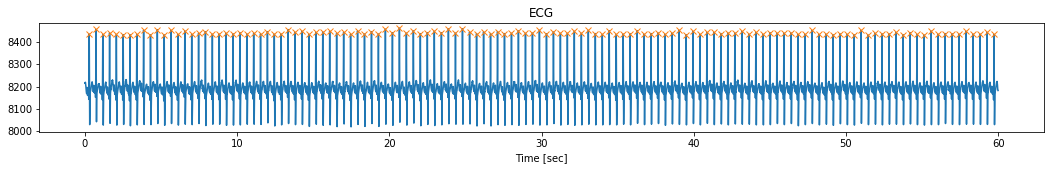

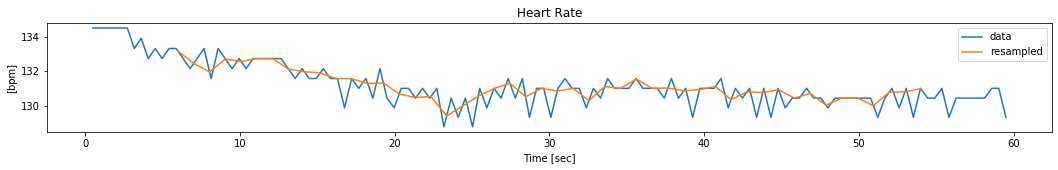

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


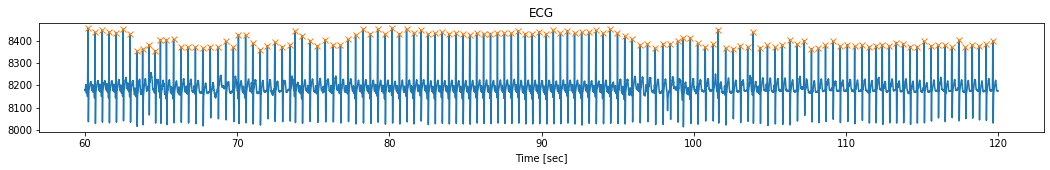

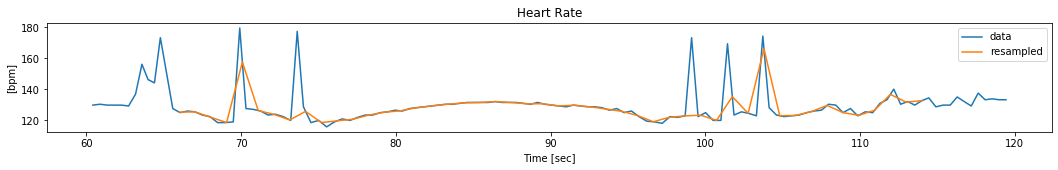

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


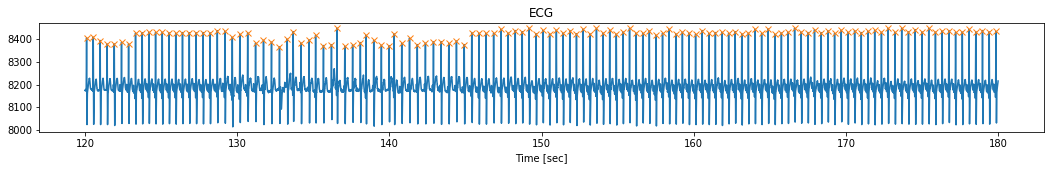

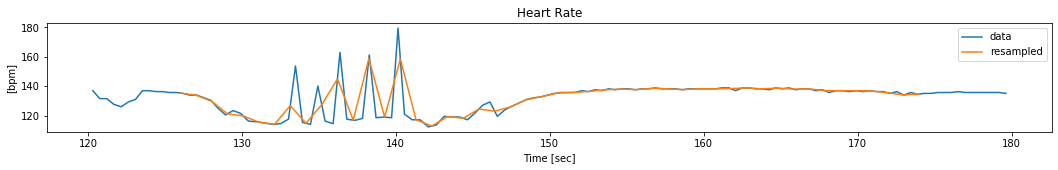

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


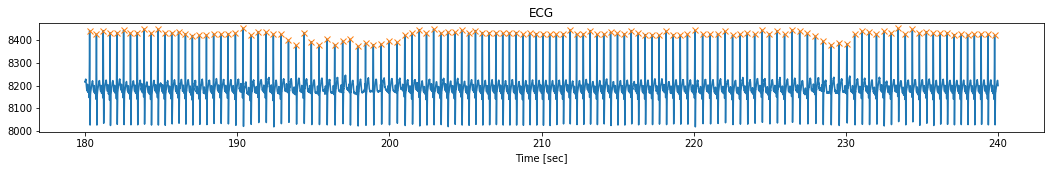

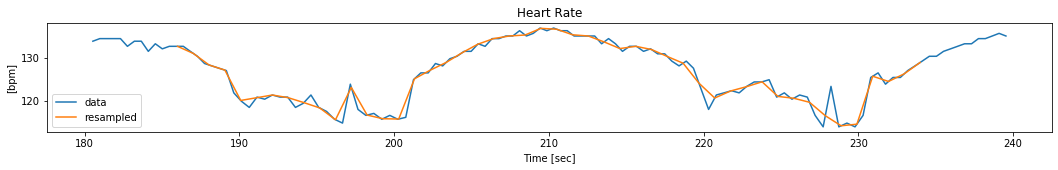

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


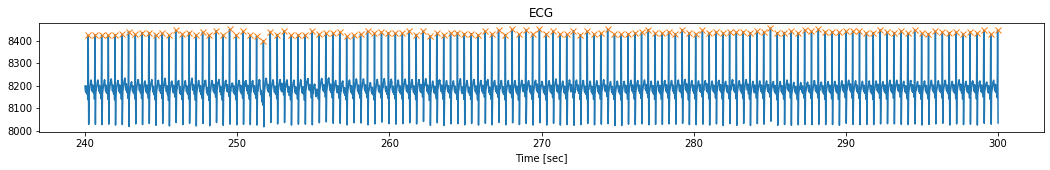

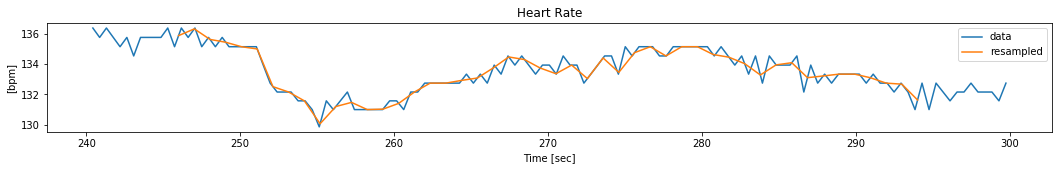

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


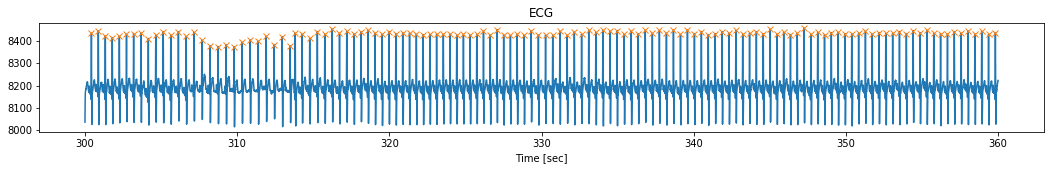

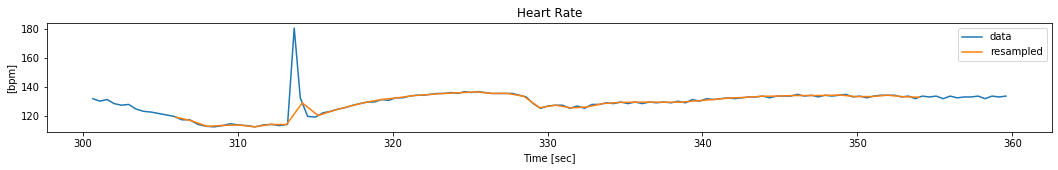

268269-2431-MDC_ECG_ELEC_POTL_II-500.csv:


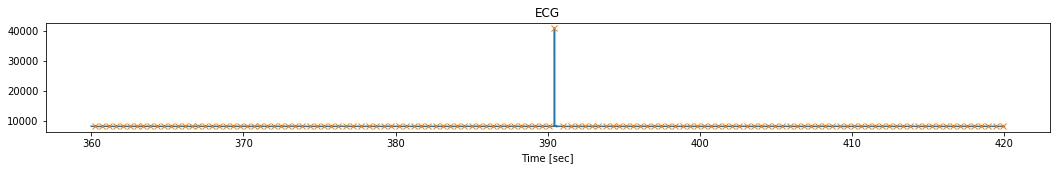

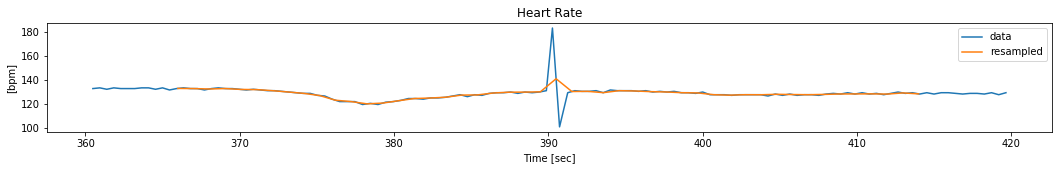

In [3]:
def hr(start, end, print1, print3):
    %run configuration.ipynb
    ecg = []
    for filename in os.listdir('samples'):
        if "MDC_ECG_ELEC_POTL_II-500" in filename:
            if print1 or print3:
                print(filename+':')
            with open('samples/'+ filename, 'r') as f:
                reader = csv.reader(f)
                for row in reader:
                    ecg.append(float(row[1]))

                ecg_small = np.array(ecg[start*500:end*500])            
                peaks,_=find_peaks(ecg_small, height=8270, distance=155) #60/(220*0.002)
                peaks_sec = (peaks + start*500) * 0.002
                time = np.arange(start, end, 0.002)

                if print1:
                    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                    plt.plot(time,ecg_small)
                    plt.plot(peaks_sec, ecg_small[peaks], "x")
                    plt.title('ECG')
                    plt.xlabel('Time [sec]')
                    plt.show()
                ecg = []

                diffs = np.diff(peaks_sec)
                peaks_sec = peaks_sec[:len(diffs)]+diffs/2
                hr = 60/diffs

                hr_interp_func = interp1d(peaks_sec, hr)
                time = np.linspace(start + MARGIN, end - MARGIN, F * (end - start -2*MARGIN))

                if print3:
                    plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
                    plt.plot(peaks_sec,hr)
                    plt.plot(time,hr_interp_func(time))
                    plt.title('Heart Rate')
                    plt.xlabel('Time [sec]')
                    plt.ylabel('[bpm]')
                    plt.legend(['data', 'resampled'], loc='best')
                    plt.show()
                
                return time, hr_interp_func(time)
'''
for i in range(7):
    hr(i*60, (1+i)*60, 1, 1)
'''
